In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib notebook

Considere um canal de comunicações cuja entrada é um sinal $x[k]$ e cuja saída é um sinal $r[k] = x[k-\delta] + n[k]$. Ou seja, a saída é uma versão ruidosa e atrasada da entrada. Seu objetivo aqui é determinar o valor do atraso $\delta$.

Para isso, vamos fazer algumas hipóteses. O sinal transmitido será composto de 10 valores consecutivos iguas a 1, sendo o restante igual a zero.

<Container object of 3 artists>

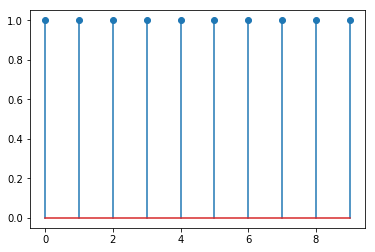

In [3]:
x = np.ones(10)
plt.stem(x)

A segunda hipótese é que o atraso é aleatório, sendo modelado como uma variável aleatória uniformemente distribuída entre 0 e 100 amostras.

In [6]:
d = np.random.randint(0, 100 + 1)

Finalmente, vamos assumir que o ruído é normal, com média zero e variância $\sigma^2$, independente e identicamente distruído.

Observe que, como o atraso varia de 1 a cem amostras, é necessário observar uma janela 111 amostras do sinal recebido para termos certeza de que o sinal x foi observado dentro da janela.

<Container object of 3 artists>

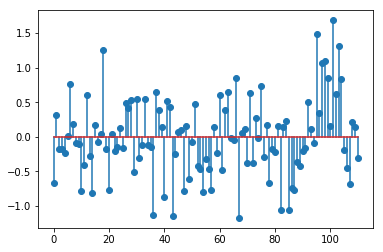

In [12]:
sigma = .5
r = sigma*np.random.randn(111)
r[d:(d+10)] += x
plt.stem(r)

Para determinar o atraso, você vai usar uma estratégia chamada máximo a posteriori: o valor de $\delta$ é aquele que é o mais provável no mundo em que o sinal $r[k]$ é observado. Para facilitar nossa notação, seja $\mathbf{r}$ um vetor contendo todas as 111 amostras de $r[k]$. Assim, o valor de $\delta$ será dado por 

$$\delta_{\mathrm{ótimo}} = \arg\max_{\delta} p_{\Delta|\mathbf{R}}(\delta|\mathbf{r})$$

Determine e implemente este detector. Busque fazer o maior número possível de simplificações. Você verá que existem diversas probabilidades e diversas funções que não precisam ser calculadas.

Imagine agora que o valor de $\delta$ seja 10. Calcule analiticamente e por simulação a probabilidade de seu detector ''preferir'' o valor de $\delta = 11$ ao invés do valor correto. Ou seja, calcule a probabilidade de $p_{\Delta|\mathbf{R}}(11|\mathbf{R}) > p_{\Delta|\mathbf{R}}(10|\mathbf{R})$.

## Solução da Parte I

Usando teorema de Bayes

$$
\delta_{\mathrm{ótimo}} = \arg\max_{\delta} p_{\Delta|\mathbf{R}}(\delta|\mathbf{r})
 = \arg\max_{\delta} 
    \frac {p_{\mathbf{R}|\Delta}(\mathbf{r}|\delta) p_{\Delta}(\delta)}
          {\sum_{\delta} p_{\mathbf{R}|\Delta}(\mathbf{r}|\delta) p_{\Delta}(\delta) }
$$

Como procuramos o maximo, tiramos todos os termos constantes:

$$\delta_{\mathrm{ótimo}} = \arg\max_{\delta} p_{\mathbf{R}|\Delta}(\mathbf{r}|\delta) $$


Em nosso modelo, para dados $\delta$ e $\sigma^2$ temos:

$$ p_{\mathbf{R}|\Delta}(\mathbf{r}|\delta) 
= \frac{1}{\sqrt{(2\pi \sigma^2)^n}} 
  \exp\left(-\frac{1}{2\sigma^2}({r}-{\mu_{\delta}})^T({r}-{\mu_{\delta}})\right) 
= \frac{1}{\sqrt{(2\pi \sigma^2)^n}} 
  \exp\left(-\frac{1}{2\sigma^2}(\sum_{}(r - \mu_{\delta})^2)\right)  
$$

onde 
$$ \mu_{\delta}[k]=1, k=\delta, ..., \delta+9 $$
$$\mu_{\delta}[k]=0, caso contrario$$

Simplificando:

$$
\begin{aligned}
\delta_{\mathrm{ótimo}} &= \arg\max_{\delta} p_{\mathbf{R}|\Delta}(\mathbf{r}|\delta) \\
\delta_{\mathrm{ótimo}}
&= \arg\max_{\delta} \frac{1}{\sqrt{(2\pi \sigma^2)^n}} 
  \exp\left(-\frac{1}{2\sigma^2}(\sum_{}(r - \mu_{\delta})^2)\right) \\
\delta_{\mathrm{ótimo}} &= \arg\min_{\delta} \sum_{}(r - \mu_{\delta})^2
\end{aligned}
$$




Delta: 25
Predicted Delta: 25


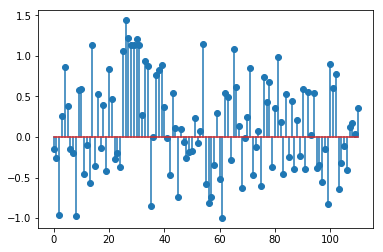

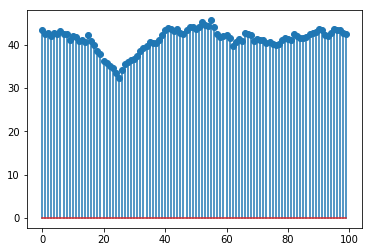

In [115]:
# Simulação:
def score(r, sigma):
    s = []
    for delta in range(0, 100):
        h = np.zeros(111)
        h[delta:(delta+10)] +=sigma
        s.append(np.sum((np.subtract(r, h))**2))
    return s


d = np.random.randint(0, 100 + 1)
print("Delta: {}".format(d))

sigma = .5
r = sigma*np.random.randn(111)
r[d:(d+10)] += x


s = score(r, sigma)
print("Predicted Delta: {}".format(np.argmin(s)))
plt.stem(r)
plt.show()
plt.stem(s)
plt.show()


## Solução Parte II

$$ 
\begin{aligned}
p_{\mathbf{R}}(p_{\Delta|\mathbf{R}}(11|\mathbf{R}) > p_{\Delta|\mathbf{R}}(10|\mathbf{R})) 
&= p_{\mathbf{R}}(\sum_{}(\mathbf{R} - \mu_{11})^2 < \sum_{}(\mathbf{R} - \mu_{10})^2) \\
&= p_{\mathbf{R}}(\sum_{}(\mathbf{R} - \mu_{11})^2 - \sum_{}(\mathbf{R} - \mu_{10})^2 < 0 )\\
&= p_{\mathbf{R}}(
    (\mathbf{R}[10] - \mu_{11}[10])^2 + 
    (\mathbf{R}[20] - \mu_{11}[20])^2 -
    (\mathbf{R}[10] - \mu_{10}[10])^2 -
    (\mathbf{R}[20] - \mu_{10}[20])^2 < 0 )\\
&=  p_{}(
    \mathcal{N}(1, \sigma^2)^2 + 
    \mathcal{N}(-1, \sigma^2)^2 -
    \mathcal{N}(0, \sigma^2)^2 -
    \mathcal{N}(0, \sigma^2)^2 < 0)
\end{aligned}
$$


In [167]:
# Comparação da solução analitica com experimental em 10000 amostras
num_samples = 10000
sigma = .5
delta = 10

def analitic_solution_sample(sigma=0.5):
    z = (+ np.random.normal(1, sigma)**2 + np.random.normal(-1, sigma)**2
         - np.random.normal(0, sigma)**2 - np.random.normal(0, sigma)**2 )
    return z < 0

def numeric_solution_sample(delta=10, sigma=0.5):
    x = np.ones(10)
    r = sigma*np.random.randn(111)
    r[delta:(delta+10)] += x
    s = score(r, sigma)
    z = s[delta+1] - s[delta]
    return z < 0

j = sum(analitic_solution_sample(sigma) for i in range(num_samples))
print("Analitical probability by sampling: {}".format(j/num_samples))

j = sum(numeric_solution_sample(delta, sigma) for i in range(num_samples))
print("Experimental probability by sampling: {}".format(j/num_samples))




Analitical probability by sampling: 0.0669
Experimental probability by sampling: 0.0753
